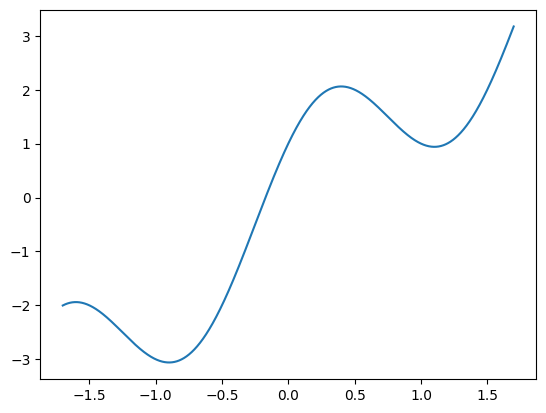

In [58]:
import numpy as np

def f(x):
    return 2*x + math.cos(math.pi*x) + math.sin(math.pi*x)

func = []
x = np.arange(-1.7, 1.7, 0.001)
for i in x:
    func.append(f(i))

import matplotlib.pyplot as plt
plt.plot(x, func)

In [59]:
import math

#оцениваем константу Липшица
def get_lipschitz_const(a, b):
    tmpL, L = 0, 0
    h = abs(b - a) / 10000
    cur = a + h
    while cur <= b:
        tmpL = abs(f(cur) - f(cur - h)) / h
        if tmpL > L:
            L = tmpL
        cur += h
    return L

#точка пересечения графиков функций
def get_point_intersection(Lx, Rx, L):
    return (f(Lx) - f(Rx)) / (2 * L) + (Lx + Rx) / 2

def bl(x, Lx, Rx, L):
        return max(f(Lx) - L*abs(x - Lx), f(Rx) - L*abs(x - Rx))

Lx_data = []
Rx_data = []
Inter_data = []

def piyavskii(a, b, N, eps):
    Lx = a
    Rx = b

    Lx_data.append(Lx)
    Rx_data.append(Rx)

    L = get_lipschitz_const(a, b)

    for i in range(N):
        PIx = get_point_intersection(Lx, Rx, L)
        PILx = get_point_intersection(Lx, PIx, L)
        PIRx = get_point_intersection(PIx, Rx, L)

        Inter_data.append(PIx)
        if f(PILx) <= f(PIRx):
            Rx = PIx
        else:
            Lx = PIx
        Lx_data.append(Lx)
        Rx_data.append(Rx)
        opt_point = get_point_intersection(Lx, Rx, L)
        Inter_data.append(opt_point)

        if abs(bl(opt_point, Lx, Rx, L) - f(opt_point)) < eps:
            print(f'Сходимость за: {i} итераций')
            break

    print(f'Оптимальное значение x: {opt_point}')
    print(f'Оптимальное значение функции: {f(opt_point)}')

In [60]:
piyavskii(-1.7, 1.7, 100, 0.001)

Сходимость за: 12 итераций
Оптимальное значение x: -0.8986645498780899
Оптимальное значение функции: -3.060085151289828


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


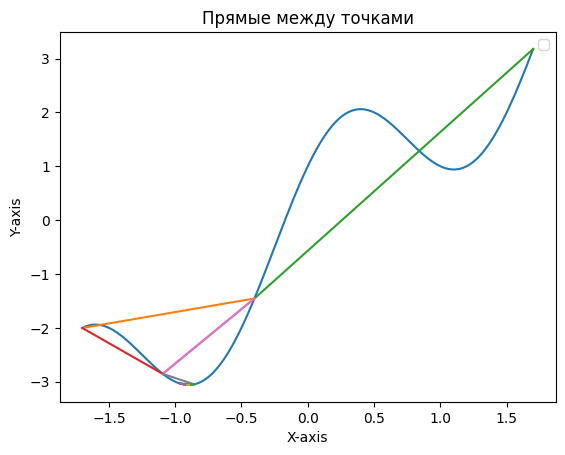

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x + math.cos(math.pi*x) + math.sin(math.pi*x)

# Задаем массивы a, b, c
a = Lx_data
b = Inter_data
c = Rx_data

plt.plot(x, func)
# Создаем графики для каждой пары точек
for i in range(len(a)):
    # Строим прямую между a_i и b_i
    plt.plot([a[i], b[i]], [f(a[i]), f(b[i])])

    # Строим прямую между b_i и c_i
    plt.plot([b[i], c[i]], [f(b[i]), f(c[i])])

# Добавляем легенду, заголовок и метки осей
plt.legend()
plt.title('Прямые между точками')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Показываем график
plt.show()

In [40]:
Lx_data

[]